Set2 has 2843 elements
Set3 has 2825 elements


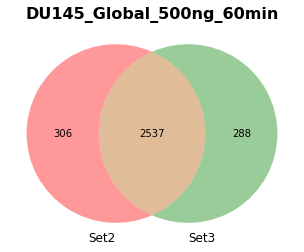

"\nvenn3_unweighted([set1, set2, set3], ('Set1', 'Set2', 'Set3'))\ntitle_font = {\n    'fontsize': 16,\n    'fontweight': 'bold'\n}\nplt.title('DU145_Global_100ng_60min', fontdict=title_font, loc='center')\nplt.savefig(address+'_unweighted_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')\nplt.show()\n"

In [17]:
'''
Comment (2023.01.18.)

Draw Venn diagrams and export its elements
'''

# conda install -c conda-forge matplotlib-venn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted, venn3_unweighted
from time import localtime, strftime


# output 파일 위한 naming: 경로+현재시간
tm = localtime()
ntm = strftime('%Y%m%d_%H%M%S', tm)
address = './outputs/venn'


# N = 3, Triplicate
#path1 = './outputs/20220615_DU145_Global_500ng_60min_7-28%_1_proteinGroups_v1.txt'
path2 = './outputs/20220615_DU145_Global_500ng_60min_7-28%_2_proteinGroups_v1.txt'
path3 = './outputs/20220615_DU145_Global_500ng_60min_7-28%_3_proteinGroups_v1.txt'


# set: 집합 선언
'''
df1 = pd.read_table(filepath_or_buffer=path1)
set1 = set(pd.Series(df1["Protein IDs"]))
print('Set1 has '+str(len(set1))+' elements')
'''
df2 = pd.read_table(filepath_or_buffer=path2)
set2 = set(pd.Series(df2["Protein IDs"]))
print('Set2 has '+str(len(set2))+' elements')

df3 = pd.read_table(filepath_or_buffer=path3)
set3 = set(pd.Series(df3["Protein IDs"]))
print('Set3 has '+str(len(set3))+' elements')


# venn2_unweighted

venn2_unweighted([set2, set3], ('Set2', 'Set3'))
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('DU145_Global_500ng_60min', fontdict=title_font, loc='center')
plt.savefig(address+'_unweighted_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')
plt.show()




# venn3_unweighted
'''
venn3_unweighted([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('DU145_Global_100ng_60min', fontdict=title_font, loc='center')
plt.savefig(address+'_unweighted_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')
plt.show()
'''

In [13]:
i123_100ng = set1 & set2 & set3

In [2]:
i123_200ng = set1 & set2 & set3

In [18]:
i123_500ng = set2 & set3

In [7]:
i123_1000ng = set1 & set2

In [10]:
i123_1000ng2 = set1 & set2

In [21]:
column_name1 = ['100ng', '200ng', '500ng', '1000ng_60min', '1000ng_120min']
column_name2 = [i123_100ng, i123_200ng, i123_500ng, i123_1000ng, i123_1000ng2]
df = pd.DataFrame({'100ng': list(i123_100ng)})

for i in range (4):
    add = pd.DataFrame({column_name1[i+1]: list(column_name2[i+1])})
    df = pd.concat([df, add], axis=1)
    
print('message! >>> All columns are merged')

# tab 으로 구분된 파일 내보내기
df.to_csv(path_or_buf='./outputs/elements_'+ntm+'.txt', sep='\t', index=False, encoding='utf-8')
print('message! >>> '+'./outputs/elements_'+ntm+'.txt added.')

message! >>> All columns are merged
message! >>> ./outputs/elements_20220627_184658.txt added.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 3350
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   100ng          1095 non-null   object
 1   200ng          1926 non-null   object
 2   500ng          2537 non-null   object
 3   1000ng_60min   2752 non-null   object
 4   1000ng_120min  3351 non-null   object
dtypes: object(5)
memory usage: 157.1+ KB
